In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import modelling

# 3D plot in parameter space
# Plot for known drugs
param_lib = modelling.BindingParameters()
drug_list = param_lib.drug_compounds

SA_model = modelling.SensitivityAnalysis()
param_names = SA_model.param_names

starting_param_df = pd.DataFrame([1] * 5, index=param_names).T
ComparisonController = modelling.ModelComparison(starting_param_df)

In [2]:
# Read data for drugs
saved_data_dir = '../../../simulation_data/'
filename = 'SA_alldrugs.csv'
df = pd.read_csv(saved_data_dir + filename,
                 header=[0, 1], index_col=[0],
                 skipinitialspace=True)

Vhalf_list = df['param_values']['Vhalf'].values
Kmax_list = df['param_values']['Kmax'].values
Ku_list = df['param_values']['Ku'].values
drug_list = df['drug']['drug'].values

RMSError_drug = df['RMSE']['RMSE'].values
MAError_drug = df['MAE']['MAE'].values

In [26]:
# Read data for space
saved_data_dir = '../../../simulation_results/'
file_prefix = 'SA_APD'
result_files = [saved_data_dir + f for f in os.listdir(saved_data_dir) if f.startswith(file_prefix)]

error_range = 20

first_iter = True
for file in result_files:
    df = pd.read_csv(file,
                     header=[0, 1], index_col=[0],
                     skipinitialspace=True)
    chosen_df = df.loc[df['RMSE']['RMSE'] < error_range]
    
    if first_iter:
        combined_df = df
        combined_chosen_df = chosen_df
        first_iter = False
    else:
        combined_chosen_df = pd.concat([combined_chosen_df, chosen_df])
        combined_df = pd.concat([combined_df, df])
        

# combined_df = combined_df.sort_values(by=[('param_values', 'Ku'), ('param_values', 'Kmax'), ('param_values', 'Vhalf')],
#                                       ascending=[False, True, True])

Vhalf_range = combined_df['param_values']['Vhalf'].values
Kmax_range = combined_df['param_values']['Kmax'].values
Ku_range = combined_df['param_values']['Ku'].values

RMSError = combined_df['RMSE']['RMSE'].values
MAError = combined_df['ME']['ME'].values

RMSError_drug = np.array(RMSError_drug) * np.array(MAError_drug) / np.abs(np.array(MAError_drug))
RMSError_space = RMSError * MAError / np.abs(MAError)

cmin = min(min(RMSError_drug), min(RMSError_space))
cmax = max(max(RMSError_drug), max(RMSError_space))

# print(combined_df['param_values'])
# print(len(combined_df.index))

In [27]:
Vhalf_chosen = combined_chosen_df['param_values']['Vhalf'].values
Kmax_chosen = combined_chosen_df['param_values']['Kmax'].values
Ku_chosen = combined_chosen_df['param_values']['Ku'].values

RMSError_chosen = combined_chosen_df['RMSE']['RMSE'].values
MAError_chosen = combined_chosen_df['ME']['ME'].values

RMSError_chosen_space = RMSError_chosen * MAError_chosen / np.abs(MAError_chosen)

In [4]:
# Vhalf_min_diff = min(np.array(sorted(Vhalf_range)[1:]) -
#                      np.array(sorted(Vhalf_range)[:-1]))
# Kmax_min_diff = min(np.array(sorted(Kmax_range)[1:]) -
#                     np.array(sorted(Kmax_range)[:-1]))
# Ku_min_diff = min(np.array(sorted(Ku_range)[1:]) -
#                   np.array(sorted(Ku_range)[:-1]))

<IPython.core.display.Javascript object>


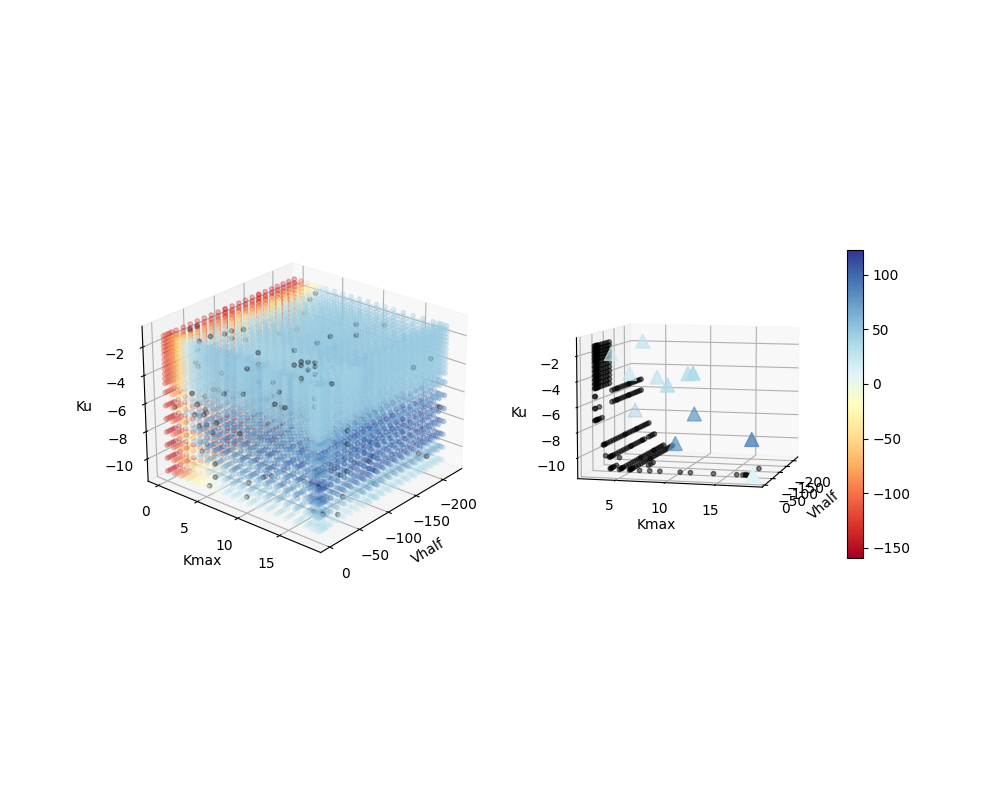

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

cmap = plt.get_cmap('RdYlBu')
cmap_norm = matplotlib.colors.Normalize(cmin, cmax)
scale_map = matplotlib.cm.ScalarMappable(norm=cmap_norm, cmap=cmap)

c = ax.scatter(Vhalf_range, np.log(Kmax_range), np.log(Ku_range),
           c=scale_map.to_rgba(RMSError_space),
           s=10, marker='o', zorder=-10, alpha=0.3)

ax.set_xlabel('Vhalf')
ax.set_ylabel('Kmax')
ax.set_zlabel('Ku')
ax.set_rasterization_zorder(0)

ax.view_init(25, 40)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(Vhalf_list, np.log(Kmax_list), np.log(Ku_list),
           c=scale_map.to_rgba(RMSError_drug),
           s=100, marker='^', zorder=-10)
ax.scatter(Vhalf_chosen, np.log(Kmax_chosen), np.log(Ku_chosen),
           c='k',
           s=10, marker='o', zorder=-10, alpha=0.5)
ax.set_xlabel('Vhalf')
ax.set_ylabel('Kmax')
ax.set_zlabel('Ku')
ax.set_rasterization_zorder(0)
ax.view_init(25, 40)

scale_map.set_array(RMSError_space)
fig.colorbar(scale_map, shrink=0.5)
# saved_fig_dir = '../../figures/testing/'
# plt.savefig(saved_fig_dir + 'test.pdf')
plt.show()

In [ ]:
# half_len = int(np.ceil(len(combined_df.index) / 2))
# Vhalf_2D = np.reshape(Vhalf_range, (4, 6)).T
# Kmax_2D = np.reshape(Kmax_range, (4, 6)).T
# Ku_2D = np.reshape(Ku_range, (4, 6)).T

# Plot contour surfaces
# _ = ax.plot_surface(
#     Ku_2D, Kmax_2D, Vhalf_2D)
# _ = ax.scatter(
#     Ku_2D, Kmax_2D, Vhalf_2D)
# _ = ax.contourf(
#     X[0, :, :], data[0, :, :], Z[0, :, :],
#     zdir='y', offset=0, **kw
# )
# C = ax.contourf(
#     data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
#     zdir='x', offset=X.max(), **kw
# )
# scale_map.set_array(RMSError_drug)
# fig.colorbar(scale_map)

# handles, labels = ax.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if
#           l not in labels[:i]]
# ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(1.0, 1.0))
# ax.set_facecolor('silver')